In [1]:
%cd ..

/home/daehyun/codespace/brain-age-prediction


/home/daehyun/.conda/envs/age/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from nilearn.datasets import load_mni152_brain_mask

import sage.xai as xai
import sage.xai.nilearn_plots as nilp_
import sage.xai.atlas as A
import sage.xai.atlas_overlap as ao

mni = load_mni152_brain_mask()
dkt_atlas = A.get_atlas(atlas_name="dkt")

INFO:/home/daehyun/codespace/brain-age-prediction/sage/xai/atlas.py:Load dkt atlas.


```python
import nibabel as nib
import nilearn.image as nili
import RQ.constants as C
import json

adni_vbm_nii = nib.load(filename=C.VBM_DIR / "adni" / "threshold.nii")
adni_vbm_nii_resample = nili.resample_img(img=adni_vbm_nii, target_shape=dkt_atlas.nii.shape, target_affine=dkt_atlas.nii.affine)

adni_dict, adni_vbm_proj = ao.calculate_overlaps(arr=adni_vbm_nii_resample, atlas=dkt_atlas,
                                                 plot_bargraph=False, plot_raw_sal=False, plot_projection=True)

with open(C.VBM_DIR / "adni" / "vbm_dict.json", mode="w") as f:
    json.dump(obj=adni_dict, fp=f, indent="\t")
```

Aggregating values across ROIs:  32%|███▏      | 32/100 [00:01<00:03, 19.75it/s]/home/daehyun/codespace/brain-age-prediction/sage/xai/atlas_overlap.py:127: RuntimeWarning: invalid value encountered in scalar divide
  xai_dict[label] = roi_val / num_nonzero


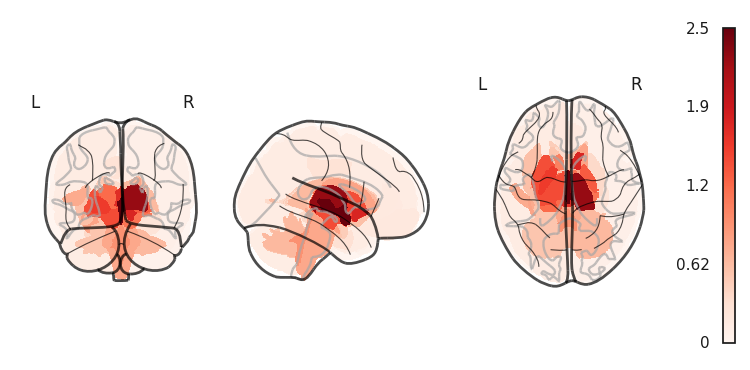

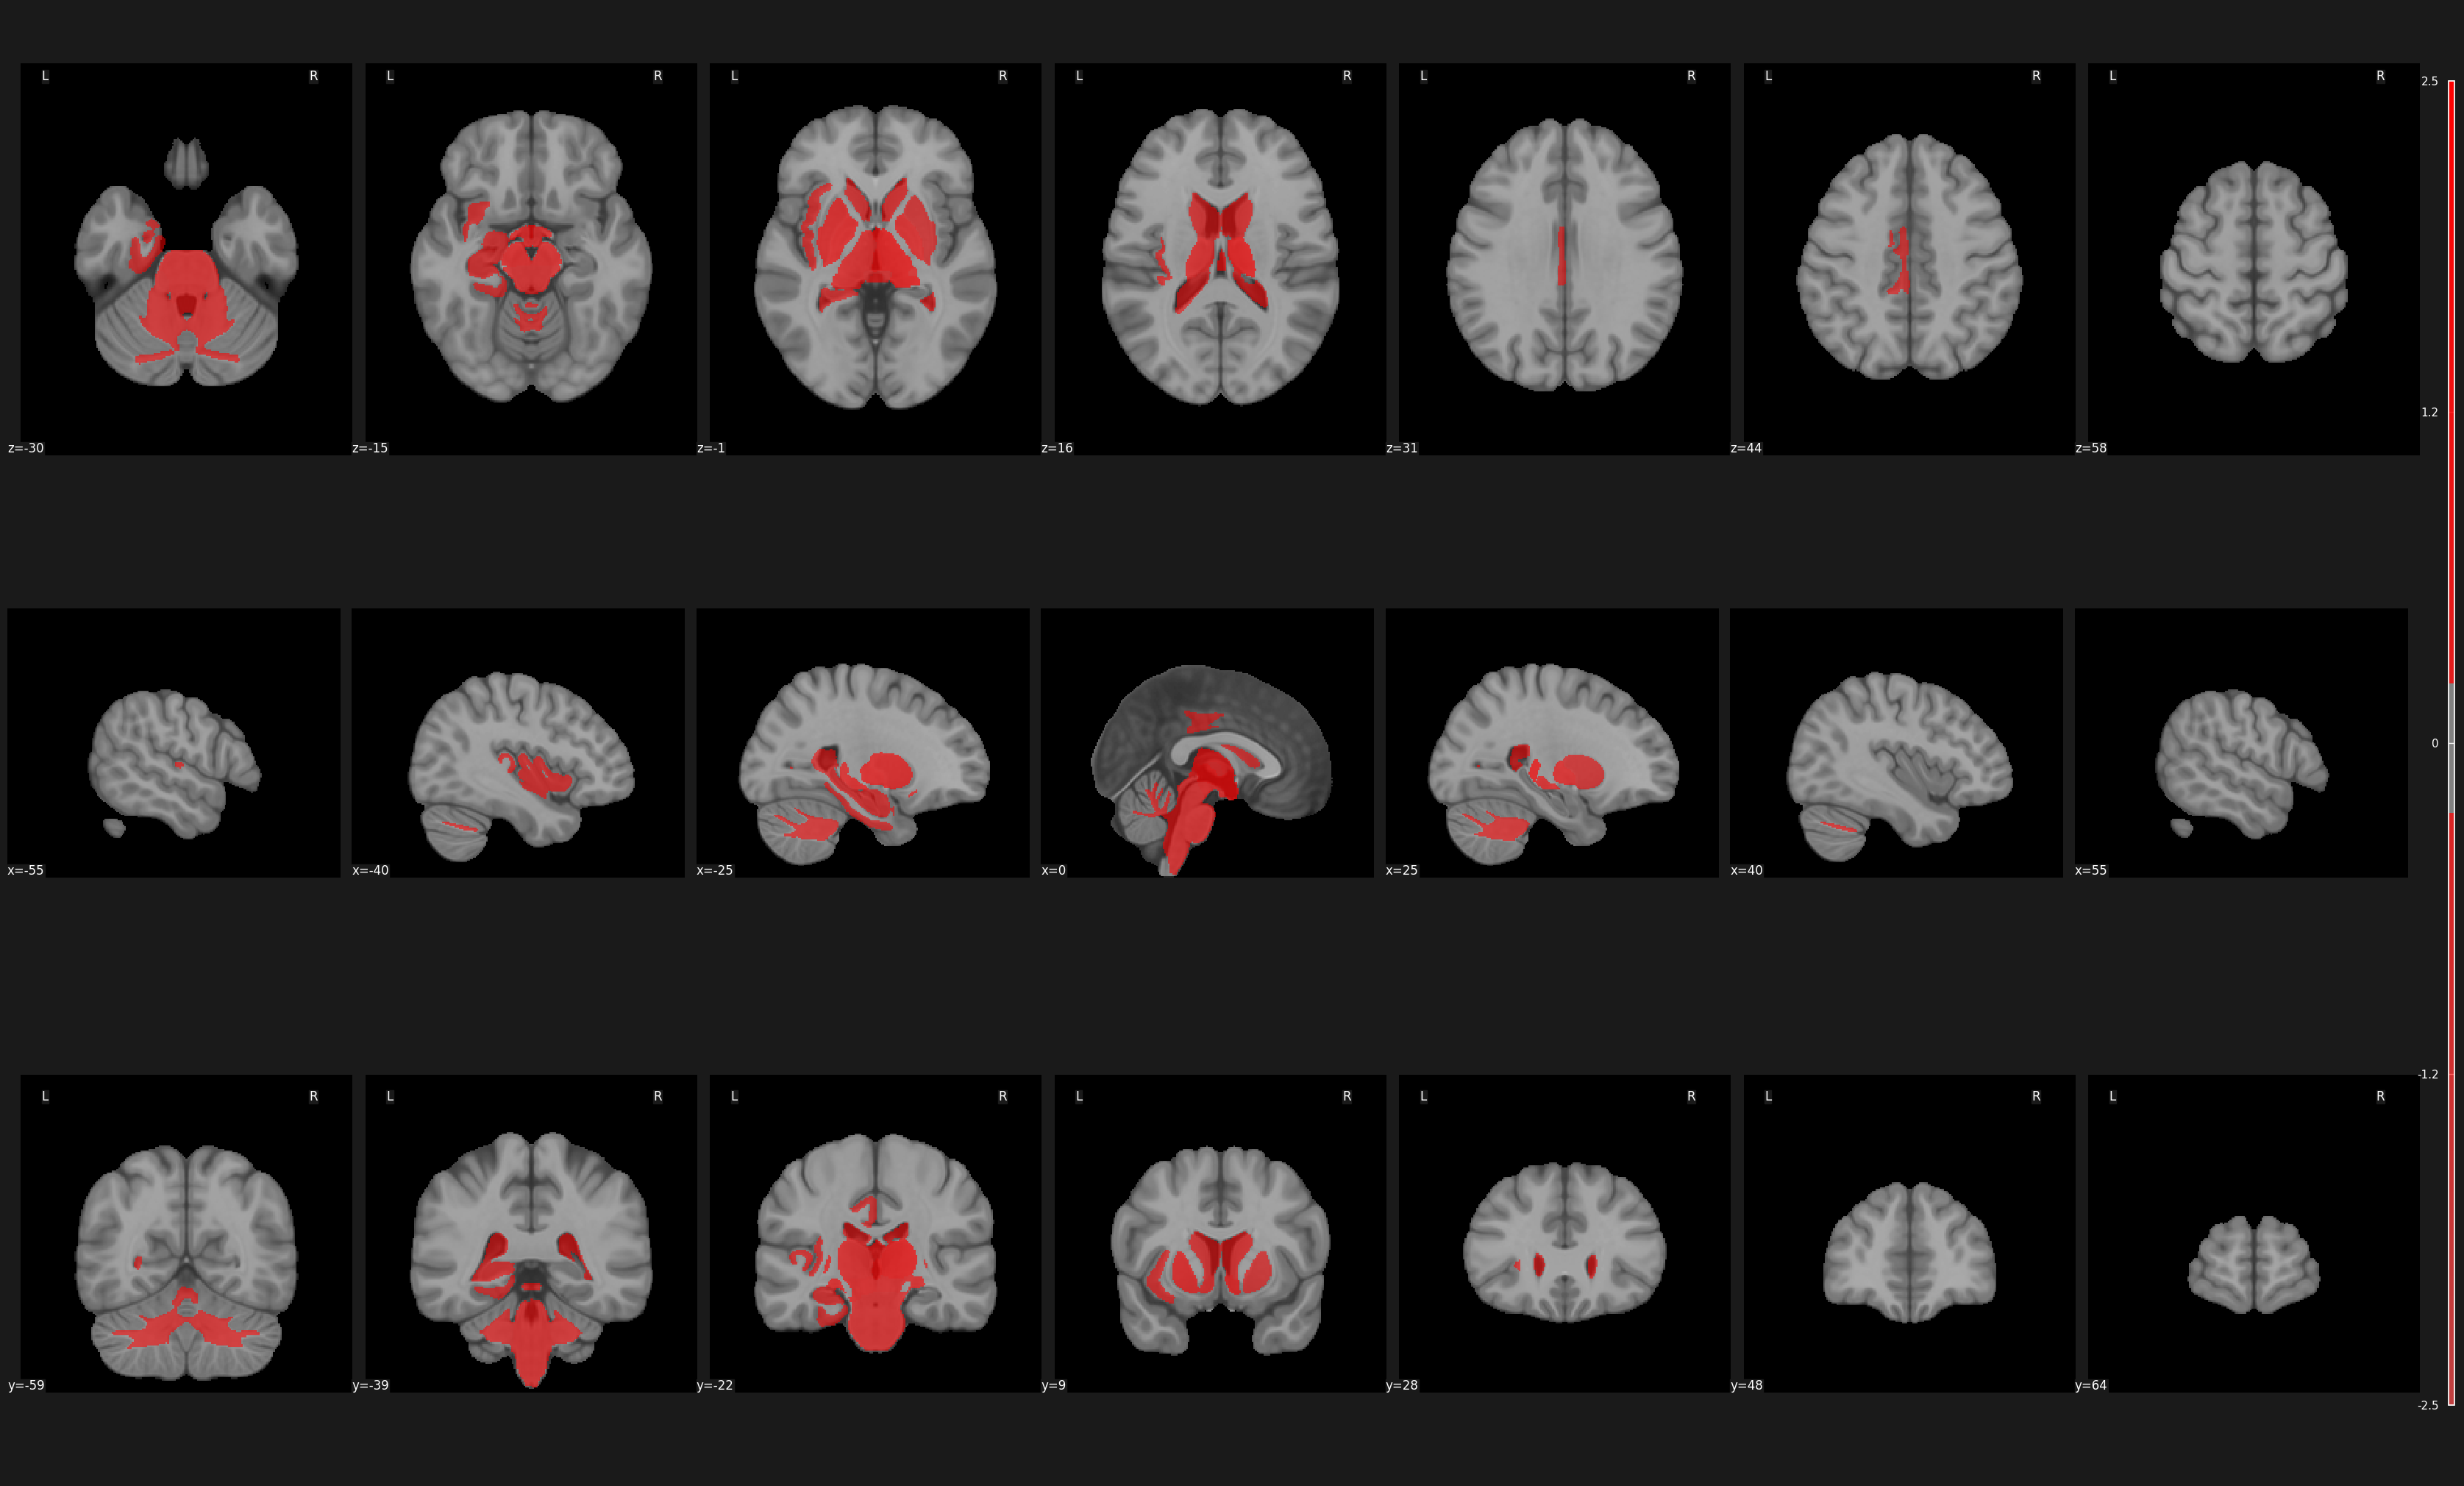

In [6]:
BASE_PATH = Path("/home/daehyun/codespace/brain-age-prediction/meta_brain/weights/default/convnext-base-43/igk0.99")

stage1 = np.load(BASE_PATH / "attrs.npy")
stage2 = np.load(BASE_PATH / "top_attr.npy")
_, stage3 = ao.calculate_overlaps(arr=stage2, atlas=dkt_atlas, plot_bargraph=False, plot_raw_sal=False, plot_projection=True)

In [15]:
plt_kwargs = dict(cmap="Reds", colorbar=False, threshold=0)

nilp_.plot_glass_brain(arr=stage1, save="stage1.png", target_affine=mni.affine, **plt_kwargs)
nilp_.plot_glass_brain(arr=stage2, save="stage2.png", target_affine=mni.affine, **plt_kwargs)
nilp_.plot_glass_brain(arr=stage3, save="stage3.png", target_affine=dkt_atlas.nii.affine, **plt_kwargs)

(None, 'stage3.png')